In [4]:
!pip install hvplot

ERROR: Could not find a version that satisfies the requirement hvplot (from versions: none)
ERROR: No matching distribution found for hvplot


In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [5]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/Real%20estate%20(1).csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.shape

(414, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [11]:
df.describe().corr().T

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.113302,0.596966,0.574770,0.537688,0.532173,0.559732,0.694969
X1 transaction date,-0.113302,1.000000,-0.531343,0.160888,-0.547263,-0.496350,-0.210371,-0.463126
X2 house age,0.596966,-0.531343,1.000000,-0.114253,0.997326,0.994840,0.935096,0.986508
X3 distance to the nearest MRT station,0.574770,0.160888,-0.114253,1.000000,-0.178336,-0.192473,-0.160764,0.037555
X4 number of convenience stores,0.537688,-0.547263,0.997326,-0.178336,1.000000,0.997993,0.933103,0.973495
X5 latitude,0.532173,-0.496350,0.994840,-0.192473,0.997993,1.000000,0.953113,0.972196
X6 longitude,0.559732,-0.210371,0.935096,-0.160764,0.933103,0.953113,1.000000,0.933361
Y house price of unit area,0.694969,-0.463126,0.986508,0.037555,0.973495,0.972196,0.933361,1.000000


In [12]:
df.max()

No                                         414.00000
X1 transaction date                       2013.58300
X2 house age                                43.80000
X3 distance to the nearest MRT station    6488.02100
X4 number of convenience stores             10.00000
X5 latitude                                 25.01459
X6 longitude                               121.56627
Y house price of unit area                 117.50000
dtype: float64

In [13]:
df.min()

No                                           1.00000
X1 transaction date                       2012.66700
X2 house age                                 0.00000
X3 distance to the nearest MRT station      23.38284
X4 number of convenience stores              0.00000
X5 latitude                                 24.93207
X6 longitude                               121.47353
Y house price of unit area                   7.60000
dtype: float64

In [14]:
df.mean()

No                                         207.500000
X1 transaction date                       2013.148971
X2 house age                                17.712560
X3 distance to the nearest MRT station    1083.885689
X4 number of convenience stores              4.094203
X5 latitude                                 24.969030
X6 longitude                               121.533361
Y house price of unit area                  37.980193
dtype: float64

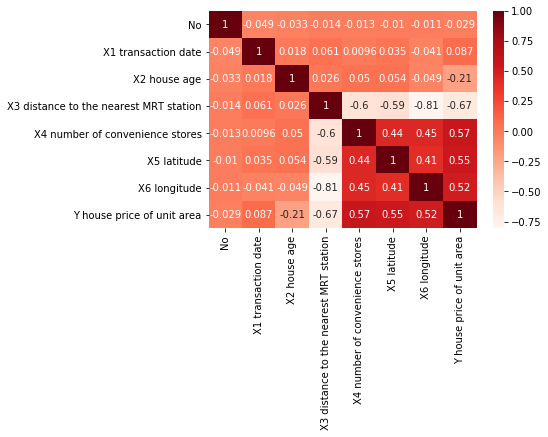

In [17]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

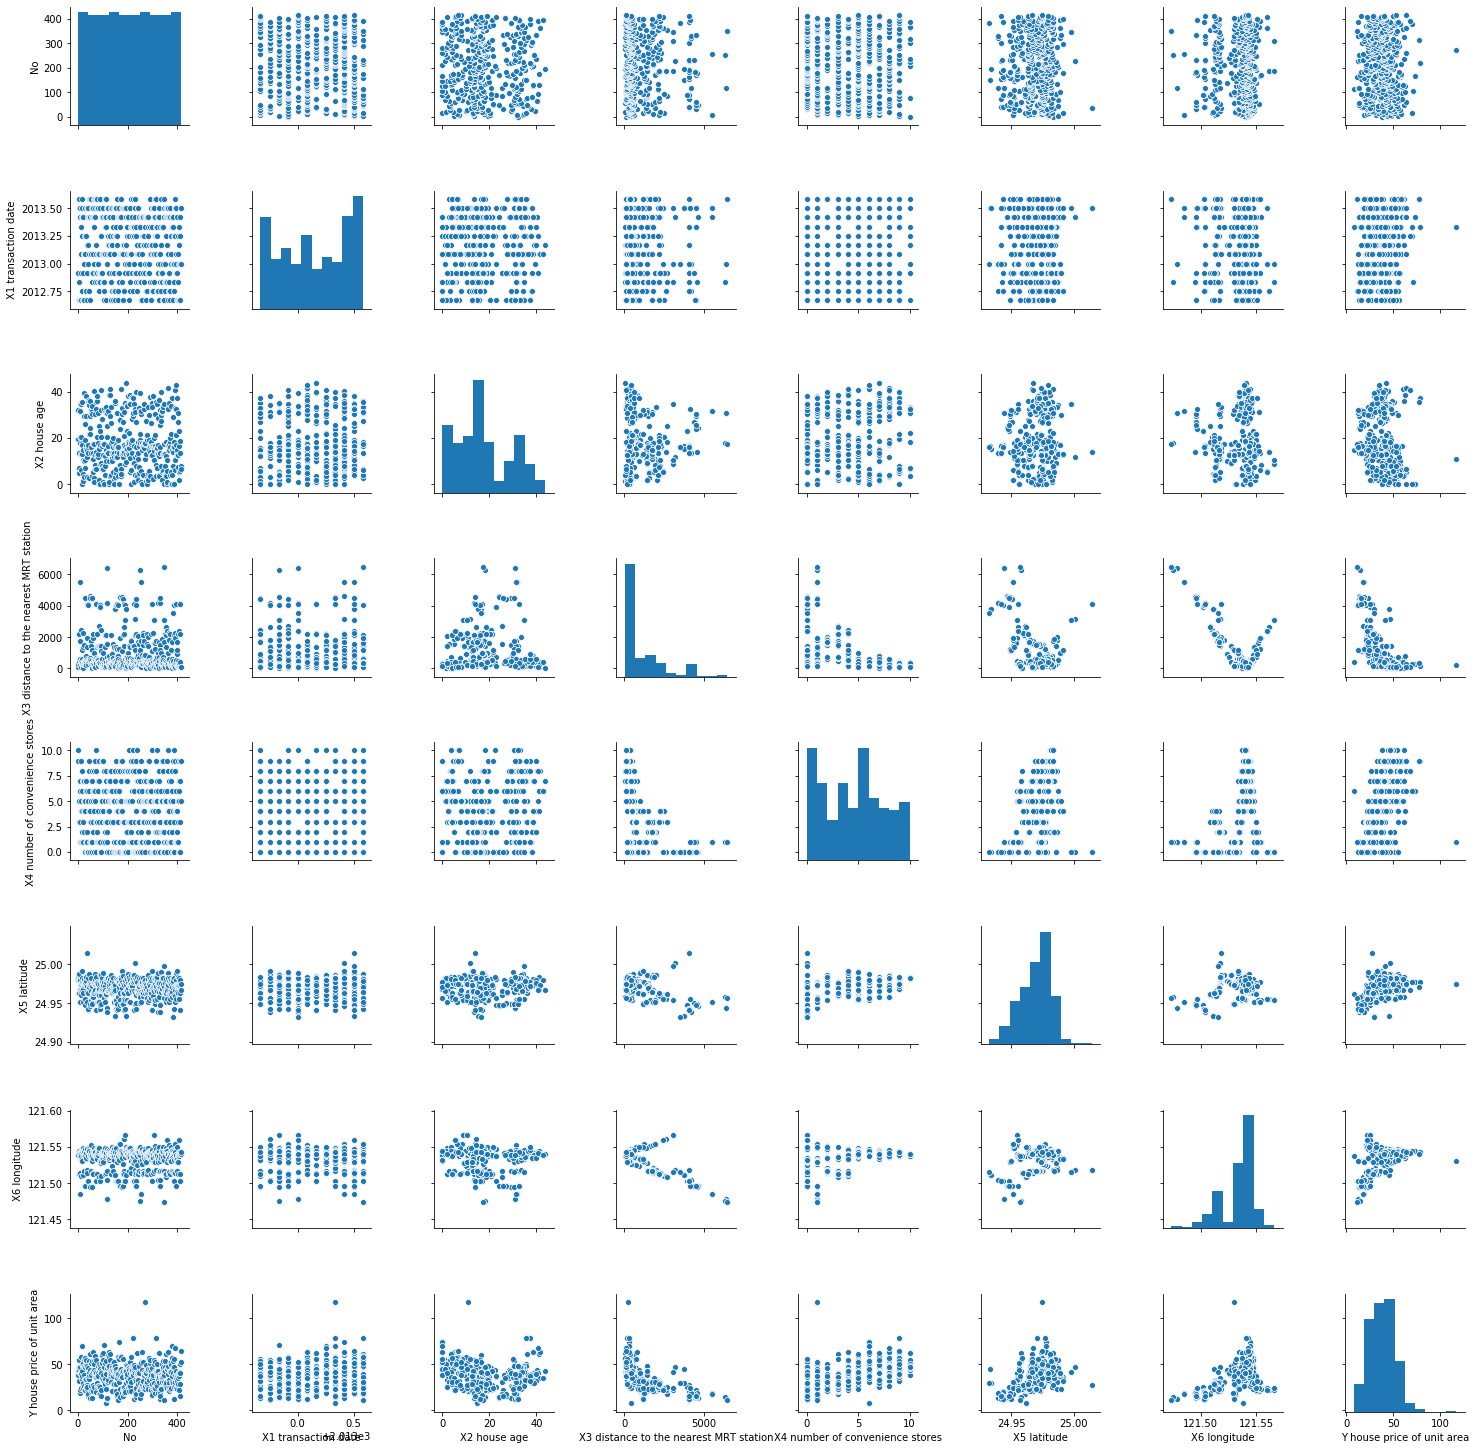

In [18]:
sns.pairplot(df)

In [19]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [25]:
x=df.drop('Y house price of unit area', axis=1)
y=df['X4 number of convenience stores']

In [26]:
x.shape

(414, 7)

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [29]:
xtrain.shape

(289, 7)

In [30]:
ytrain.shape

(289,)

In [31]:
li=LinearRegression()

In [32]:
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
li.score(xtest,ytest)*100

100.0

In [37]:
pred_li=li.predict(xtest)

In [40]:
MAE= metrics.mean_absolute_error(ytest, pred_li)
MSE=metrics.mean_squared_error(ytest, pred_li)
RMSE= np.sqrt(MSE)

In [41]:
MAE

3.1208559064537353e-15

In [42]:
MSE

1.2930288509806385e-29

In [43]:
RMSE

3.5958710363146205e-15

In [44]:
df['X4 number of convenience stores'].mean()

4.094202898550725

In [45]:
test_residual= ytest - pred_li

In [47]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [49]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

100.0

In [50]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

32.0

In [53]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63        19
           1       0.36      0.33      0.34        15
           2       0.33      0.33      0.33         6
           3       0.60      0.64      0.62        14
           4       0.40      0.18      0.25        11
           5       0.25      0.42      0.31        19
           6       0.12      0.08      0.10        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6

    accuracy                           0.32       125
   macro avg       0.24      0.24      0.24       125
weighted avg       0.30      0.32      0.30       125



In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

35.199999999999996

In [56]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        11
           5       0.19      1.00      0.32        19
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         3
          10       1.00      1.00      1.00         6

    accuracy                           0.35       125
   macro avg       0.20      0.27      0.21       125
weighted avg       0.23      0.35      0.25       125



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.ensemble import BaggingClassifier

In [58]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

100.0

In [59]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

100.0

In [62]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

96.0

In [65]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       0.83      0.83      0.83         6
           3       0.81      0.93      0.87        14
           4       1.00      0.73      0.84        11
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



In [66]:
from sklearn.svm import SVC

In [67]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

30.4

In [68]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

           0       0.78      0.37      0.50        19
           1       0.14      0.07      0.09        15
           2       0.00      0.00      0.00         6
           3       0.42      0.79      0.55        14
           4       0.00      0.00      0.00        11
           5       0.23      1.00      0.37        19
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6

    accuracy                           0.30       125
   macro avg       0.14      0.20      0.14       125
weighted avg       0.22      0.30      0.21       125



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

89.60000000000001

In [71]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       0.83      0.83      0.83         6
           3       0.75      0.86      0.80        14
           4       0.86      0.55      0.67        11
           5       0.95      1.00      0.97        19
           6       0.93      1.00      0.96        13
           7       0.90      0.90      0.90        10
           8       1.00      0.89      0.94         9
           9       0.50      1.00      0.67         3
          10       1.00      0.50      0.67         6

    accuracy                           0.90       125
   macro avg       0.88      0.87      0.85       125
weighted avg       0.91      0.90      0.89       125



In [72]:
from catboost import CatBoostClassifier

In [73]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.074273
0:	learn: 2.2551141	total: 419ms	remaining: 6m 58s
1:	learn: 2.1851575	total: 451ms	remaining: 3m 45s
2:	learn: 2.0744615	total: 485ms	remaining: 2m 41s
3:	learn: 1.9469301	total: 511ms	remaining: 2m 7s
4:	learn: 1.8887934	total: 533ms	remaining: 1m 46s
5:	learn: 1.8125450	total: 553ms	remaining: 1m 31s
6:	learn: 1.7208723	total: 577ms	remaining: 1m 21s
7:	learn: 1.6691630	total: 595ms	remaining: 1m 13s
8:	learn: 1.5621327	total: 613ms	remaining: 1m 7s
9:	learn: 1.5059678	total: 638ms	remaining: 1m 3s
10:	learn: 1.4740173	total: 661ms	remaining: 59.4s
11:	learn: 1.3826050	total: 683ms	remaining: 56.3s
12:	learn: 1.3363295	total: 704ms	remaining: 53.4s
13:	learn: 1.2838173	total: 728ms	remaining: 51.3s
14:	learn: 1.2347054	total: 754ms	remaining: 49.5s
15:	learn: 1.1923498	total: 780ms	remaining: 48s
16:	learn: 1.1395944	total: 807ms	remaining: 46.7s
17:	learn: 1.0923766	total: 832ms	remaining: 45.4s
18:	learn: 1.0620314	total: 866ms	remaining: 44.7s
19:	le

170:	learn: 0.0447552	total: 3.95s	remaining: 19.1s
171:	learn: 0.0443794	total: 3.97s	remaining: 19.1s
172:	learn: 0.0438160	total: 3.99s	remaining: 19.1s
173:	learn: 0.0431245	total: 4s	remaining: 19s
174:	learn: 0.0425972	total: 4.02s	remaining: 19s
175:	learn: 0.0422345	total: 4.04s	remaining: 18.9s
176:	learn: 0.0416034	total: 4.06s	remaining: 18.9s
177:	learn: 0.0411970	total: 4.09s	remaining: 18.9s
178:	learn: 0.0408295	total: 4.11s	remaining: 18.8s
179:	learn: 0.0403456	total: 4.13s	remaining: 18.8s
180:	learn: 0.0399094	total: 4.16s	remaining: 18.8s
181:	learn: 0.0393952	total: 4.17s	remaining: 18.8s
182:	learn: 0.0390241	total: 4.19s	remaining: 18.7s
183:	learn: 0.0385668	total: 4.21s	remaining: 18.7s
184:	learn: 0.0381776	total: 4.22s	remaining: 18.6s
185:	learn: 0.0376862	total: 4.24s	remaining: 18.6s
186:	learn: 0.0375736	total: 4.26s	remaining: 18.5s
187:	learn: 0.0372086	total: 4.27s	remaining: 18.5s
188:	learn: 0.0369389	total: 4.29s	remaining: 18.4s
189:	learn: 0.03649

331:	learn: 0.0155789	total: 7.08s	remaining: 14.2s
332:	learn: 0.0155122	total: 7.1s	remaining: 14.2s
333:	learn: 0.0154518	total: 7.11s	remaining: 14.2s
334:	learn: 0.0153713	total: 7.13s	remaining: 14.2s
335:	learn: 0.0152871	total: 7.15s	remaining: 14.1s
336:	learn: 0.0152236	total: 7.17s	remaining: 14.1s
337:	learn: 0.0151591	total: 7.18s	remaining: 14.1s
338:	learn: 0.0151011	total: 7.2s	remaining: 14s
339:	learn: 0.0150480	total: 7.21s	remaining: 14s
340:	learn: 0.0150424	total: 7.23s	remaining: 14s
341:	learn: 0.0149675	total: 7.25s	remaining: 14s
342:	learn: 0.0149202	total: 7.29s	remaining: 14s
343:	learn: 0.0148426	total: 7.31s	remaining: 13.9s
344:	learn: 0.0147893	total: 7.34s	remaining: 13.9s
345:	learn: 0.0147439	total: 7.36s	remaining: 13.9s
346:	learn: 0.0146566	total: 7.38s	remaining: 13.9s
347:	learn: 0.0146219	total: 7.41s	remaining: 13.9s
348:	learn: 0.0145830	total: 7.43s	remaining: 13.9s
349:	learn: 0.0145261	total: 7.45s	remaining: 13.8s
350:	learn: 0.0144626	to

491:	learn: 0.0091444	total: 9.88s	remaining: 10.2s
492:	learn: 0.0091064	total: 9.9s	remaining: 10.2s
493:	learn: 0.0090742	total: 9.91s	remaining: 10.2s
494:	learn: 0.0090369	total: 9.93s	remaining: 10.1s
495:	learn: 0.0090222	total: 9.95s	remaining: 10.1s
496:	learn: 0.0090149	total: 9.96s	remaining: 10.1s
497:	learn: 0.0089980	total: 9.98s	remaining: 10.1s
498:	learn: 0.0089678	total: 10s	remaining: 10s
499:	learn: 0.0089509	total: 10s	remaining: 10s
500:	learn: 0.0089123	total: 10s	remaining: 9.99s
501:	learn: 0.0089101	total: 10s	remaining: 9.96s
502:	learn: 0.0088808	total: 10.1s	remaining: 9.94s
503:	learn: 0.0088660	total: 10.1s	remaining: 9.92s
504:	learn: 0.0088417	total: 10.1s	remaining: 9.9s
505:	learn: 0.0088198	total: 10.1s	remaining: 9.88s
506:	learn: 0.0087908	total: 10.1s	remaining: 9.85s
507:	learn: 0.0087684	total: 10.1s	remaining: 9.83s
508:	learn: 0.0087327	total: 10.2s	remaining: 9.81s
509:	learn: 0.0087126	total: 10.2s	remaining: 9.78s
510:	learn: 0.0086845	tota

650:	learn: 0.0063630	total: 12.6s	remaining: 6.76s
651:	learn: 0.0063529	total: 12.6s	remaining: 6.74s
652:	learn: 0.0063514	total: 12.7s	remaining: 6.72s
653:	learn: 0.0063494	total: 12.7s	remaining: 6.71s
654:	learn: 0.0063401	total: 12.7s	remaining: 6.69s
655:	learn: 0.0063203	total: 12.7s	remaining: 6.67s
656:	learn: 0.0063187	total: 12.7s	remaining: 6.65s
657:	learn: 0.0063035	total: 12.8s	remaining: 6.63s
658:	learn: 0.0062885	total: 12.8s	remaining: 6.61s
659:	learn: 0.0062810	total: 12.8s	remaining: 6.59s
660:	learn: 0.0062733	total: 12.8s	remaining: 6.57s
661:	learn: 0.0062630	total: 12.8s	remaining: 6.55s
662:	learn: 0.0062447	total: 12.8s	remaining: 6.53s
663:	learn: 0.0062290	total: 12.9s	remaining: 6.51s
664:	learn: 0.0062195	total: 12.9s	remaining: 6.49s
665:	learn: 0.0062068	total: 12.9s	remaining: 6.47s
666:	learn: 0.0061933	total: 12.9s	remaining: 6.45s
667:	learn: 0.0061789	total: 12.9s	remaining: 6.43s
668:	learn: 0.0061693	total: 12.9s	remaining: 6.41s
669:	learn: 

819:	learn: 0.0048834	total: 15.5s	remaining: 3.41s
820:	learn: 0.0048742	total: 15.6s	remaining: 3.39s
821:	learn: 0.0048702	total: 15.6s	remaining: 3.37s
822:	learn: 0.0048692	total: 15.6s	remaining: 3.35s
823:	learn: 0.0048596	total: 15.6s	remaining: 3.33s
824:	learn: 0.0048519	total: 15.6s	remaining: 3.31s
825:	learn: 0.0048434	total: 15.6s	remaining: 3.29s
826:	learn: 0.0048362	total: 15.7s	remaining: 3.27s
827:	learn: 0.0048282	total: 15.7s	remaining: 3.26s
828:	learn: 0.0048191	total: 15.7s	remaining: 3.24s
829:	learn: 0.0048134	total: 15.7s	remaining: 3.22s
830:	learn: 0.0048066	total: 15.7s	remaining: 3.2s
831:	learn: 0.0047994	total: 15.7s	remaining: 3.18s
832:	learn: 0.0047900	total: 15.8s	remaining: 3.16s
833:	learn: 0.0047815	total: 15.8s	remaining: 3.14s
834:	learn: 0.0047700	total: 15.8s	remaining: 3.12s
835:	learn: 0.0047647	total: 15.8s	remaining: 3.1s
836:	learn: 0.0047566	total: 15.8s	remaining: 3.08s
837:	learn: 0.0047545	total: 15.8s	remaining: 3.06s
838:	learn: 0.

984:	learn: 0.0039355	total: 18.4s	remaining: 280ms
985:	learn: 0.0039305	total: 18.4s	remaining: 261ms
986:	learn: 0.0039275	total: 18.4s	remaining: 243ms
987:	learn: 0.0039238	total: 18.4s	remaining: 224ms
988:	learn: 0.0039178	total: 18.4s	remaining: 205ms
989:	learn: 0.0039172	total: 18.5s	remaining: 187ms
990:	learn: 0.0039135	total: 18.5s	remaining: 168ms
991:	learn: 0.0039103	total: 18.5s	remaining: 149ms
992:	learn: 0.0039056	total: 18.5s	remaining: 131ms
993:	learn: 0.0039016	total: 18.5s	remaining: 112ms
994:	learn: 0.0038970	total: 18.6s	remaining: 93.2ms
995:	learn: 0.0038966	total: 18.6s	remaining: 74.6ms
996:	learn: 0.0038945	total: 18.6s	remaining: 55.9ms
997:	learn: 0.0038909	total: 18.6s	remaining: 37.3ms
998:	learn: 0.0038831	total: 18.6s	remaining: 18.6ms
999:	learn: 0.0038772	total: 18.6s	remaining: 0us


In [74]:
from catboost import CatBoostRegressor

In [75]:
cat2=CatBoostRegressor()
cat2.fit(xtrain,ytrain)

Learning rate set to 0.031293
0:	learn: 2.8738765	total: 74.5ms	remaining: 1m 14s
1:	learn: 2.8181422	total: 78.8ms	remaining: 39.3s
2:	learn: 2.7523771	total: 82.9ms	remaining: 27.6s
3:	learn: 2.6833450	total: 87ms	remaining: 21.7s
4:	learn: 2.6186356	total: 92.1ms	remaining: 18.3s
5:	learn: 2.5655516	total: 95.8ms	remaining: 15.9s
6:	learn: 2.5036514	total: 99.5ms	remaining: 14.1s
7:	learn: 2.4486903	total: 104ms	remaining: 13s
8:	learn: 2.3961923	total: 108ms	remaining: 11.9s
9:	learn: 2.3408864	total: 113ms	remaining: 11.2s
10:	learn: 2.2906917	total: 115ms	remaining: 10.3s
11:	learn: 2.2434016	total: 117ms	remaining: 9.66s
12:	learn: 2.1910088	total: 120ms	remaining: 9.1s
13:	learn: 2.1459223	total: 122ms	remaining: 8.61s
14:	learn: 2.0967711	total: 125ms	remaining: 8.23s
15:	learn: 2.0430849	total: 128ms	remaining: 7.87s
16:	learn: 1.9944513	total: 131ms	remaining: 7.55s
17:	learn: 1.9472755	total: 133ms	remaining: 7.25s
18:	learn: 1.8984246	total: 135ms	remaining: 7s
19:	learn: 

160:	learn: 0.1413184	total: 537ms	remaining: 2.8s
161:	learn: 0.1399338	total: 540ms	remaining: 2.79s
162:	learn: 0.1386537	total: 543ms	remaining: 2.79s
163:	learn: 0.1372521	total: 547ms	remaining: 2.79s
164:	learn: 0.1357972	total: 552ms	remaining: 2.79s
165:	learn: 0.1346891	total: 557ms	remaining: 2.8s
166:	learn: 0.1334671	total: 560ms	remaining: 2.79s
167:	learn: 0.1323764	total: 563ms	remaining: 2.79s
168:	learn: 0.1311309	total: 567ms	remaining: 2.79s
169:	learn: 0.1299239	total: 571ms	remaining: 2.79s
170:	learn: 0.1286162	total: 574ms	remaining: 2.78s
171:	learn: 0.1275325	total: 576ms	remaining: 2.77s
172:	learn: 0.1263631	total: 578ms	remaining: 2.76s
173:	learn: 0.1251542	total: 580ms	remaining: 2.75s
174:	learn: 0.1243463	total: 583ms	remaining: 2.75s
175:	learn: 0.1232293	total: 585ms	remaining: 2.74s
176:	learn: 0.1221282	total: 587ms	remaining: 2.73s
177:	learn: 0.1209866	total: 589ms	remaining: 2.72s
178:	learn: 0.1198540	total: 591ms	remaining: 2.71s
179:	learn: 0.

328:	learn: 0.0563626	total: 1.02s	remaining: 2.08s
329:	learn: 0.0561341	total: 1.02s	remaining: 2.08s
330:	learn: 0.0559234	total: 1.03s	remaining: 2.08s
331:	learn: 0.0558321	total: 1.03s	remaining: 2.08s
332:	learn: 0.0557843	total: 1.03s	remaining: 2.07s
333:	learn: 0.0555106	total: 1.04s	remaining: 2.07s
334:	learn: 0.0554072	total: 1.04s	remaining: 2.06s
335:	learn: 0.0551472	total: 1.04s	remaining: 2.06s
336:	learn: 0.0548810	total: 1.04s	remaining: 2.06s
337:	learn: 0.0548170	total: 1.05s	remaining: 2.05s
338:	learn: 0.0546175	total: 1.05s	remaining: 2.05s
339:	learn: 0.0543458	total: 1.05s	remaining: 2.04s
340:	learn: 0.0541523	total: 1.05s	remaining: 2.04s
341:	learn: 0.0538972	total: 1.06s	remaining: 2.03s
342:	learn: 0.0536930	total: 1.06s	remaining: 2.03s
343:	learn: 0.0536514	total: 1.06s	remaining: 2.02s
344:	learn: 0.0535572	total: 1.06s	remaining: 2.02s
345:	learn: 0.0535104	total: 1.06s	remaining: 2.01s
346:	learn: 0.0533064	total: 1.07s	remaining: 2.01s
347:	learn: 

522:	learn: 0.0318042	total: 1.49s	remaining: 1.35s
523:	learn: 0.0317392	total: 1.49s	remaining: 1.35s
524:	learn: 0.0316532	total: 1.49s	remaining: 1.35s
525:	learn: 0.0315730	total: 1.5s	remaining: 1.35s
526:	learn: 0.0314633	total: 1.5s	remaining: 1.34s
527:	learn: 0.0313695	total: 1.5s	remaining: 1.34s
528:	learn: 0.0312841	total: 1.5s	remaining: 1.34s
529:	learn: 0.0312184	total: 1.51s	remaining: 1.33s
530:	learn: 0.0311083	total: 1.51s	remaining: 1.33s
531:	learn: 0.0310041	total: 1.51s	remaining: 1.33s
532:	learn: 0.0309078	total: 1.51s	remaining: 1.33s
533:	learn: 0.0308255	total: 1.52s	remaining: 1.32s
534:	learn: 0.0307439	total: 1.52s	remaining: 1.32s
535:	learn: 0.0306232	total: 1.52s	remaining: 1.32s
536:	learn: 0.0305288	total: 1.52s	remaining: 1.31s
537:	learn: 0.0304493	total: 1.53s	remaining: 1.31s
538:	learn: 0.0303861	total: 1.53s	remaining: 1.31s
539:	learn: 0.0302913	total: 1.53s	remaining: 1.31s
540:	learn: 0.0302076	total: 1.53s	remaining: 1.3s
541:	learn: 0.030

720:	learn: 0.0198848	total: 1.96s	remaining: 759ms
721:	learn: 0.0198525	total: 1.96s	remaining: 756ms
722:	learn: 0.0198101	total: 1.97s	remaining: 753ms
723:	learn: 0.0197938	total: 1.97s	remaining: 750ms
724:	learn: 0.0197444	total: 1.97s	remaining: 747ms
725:	learn: 0.0197028	total: 1.97s	remaining: 744ms
726:	learn: 0.0196567	total: 1.97s	remaining: 741ms
727:	learn: 0.0195895	total: 1.98s	remaining: 738ms
728:	learn: 0.0195441	total: 1.98s	remaining: 736ms
729:	learn: 0.0194906	total: 1.98s	remaining: 733ms
730:	learn: 0.0194523	total: 1.98s	remaining: 730ms
731:	learn: 0.0194005	total: 1.99s	remaining: 727ms
732:	learn: 0.0193600	total: 1.99s	remaining: 725ms
733:	learn: 0.0193223	total: 1.99s	remaining: 722ms
734:	learn: 0.0192528	total: 1.99s	remaining: 719ms
735:	learn: 0.0192170	total: 2s	remaining: 716ms
736:	learn: 0.0192033	total: 2s	remaining: 713ms
737:	learn: 0.0191705	total: 2s	remaining: 710ms
738:	learn: 0.0191447	total: 2s	remaining: 707ms
739:	learn: 0.0191175	to

919:	learn: 0.0140483	total: 2.43s	remaining: 211ms
920:	learn: 0.0140350	total: 2.43s	remaining: 209ms
921:	learn: 0.0139917	total: 2.43s	remaining: 206ms
922:	learn: 0.0139617	total: 2.44s	remaining: 203ms
923:	learn: 0.0139436	total: 2.44s	remaining: 201ms
924:	learn: 0.0139234	total: 2.44s	remaining: 198ms
925:	learn: 0.0138801	total: 2.44s	remaining: 195ms
926:	learn: 0.0138733	total: 2.44s	remaining: 193ms
927:	learn: 0.0138453	total: 2.45s	remaining: 190ms
928:	learn: 0.0138338	total: 2.45s	remaining: 187ms
929:	learn: 0.0138045	total: 2.45s	remaining: 185ms
930:	learn: 0.0137762	total: 2.46s	remaining: 182ms
931:	learn: 0.0137520	total: 2.46s	remaining: 179ms
932:	learn: 0.0137266	total: 2.46s	remaining: 177ms
933:	learn: 0.0137048	total: 2.46s	remaining: 174ms
934:	learn: 0.0136867	total: 2.46s	remaining: 171ms
935:	learn: 0.0136746	total: 2.47s	remaining: 169ms
936:	learn: 0.0136467	total: 2.47s	remaining: 166ms
937:	learn: 0.0136285	total: 2.48s	remaining: 164ms
938:	learn: 

In [78]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,DecisionTreeClassifier,100.0
3,BaggingClassifier,100.0
4,GaussianNB,100.0
6,ExtraTreesClassifier,96.0
8,RandomForestClassifier,89.6
2,AdaBoostClassifier,35.2
5,AdaBoostClassifier,35.2
1,KNeighborsClassifier,32.0
7,SVM,30.4


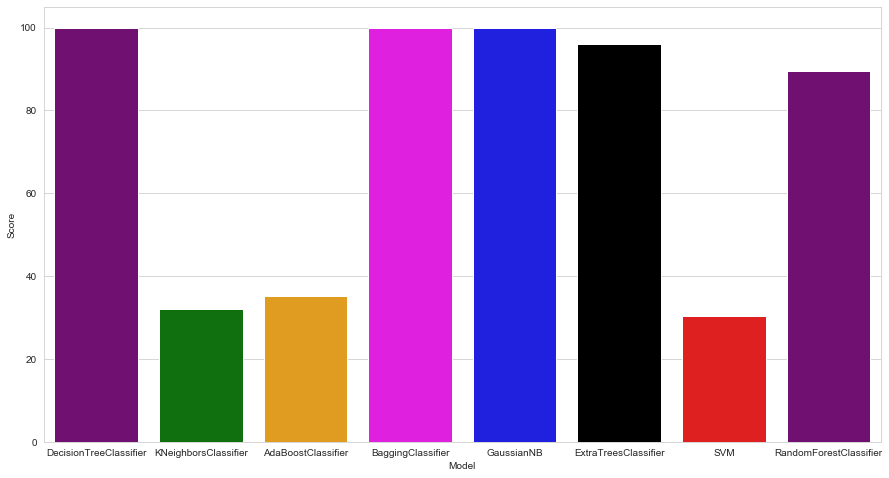

In [83]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [84]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


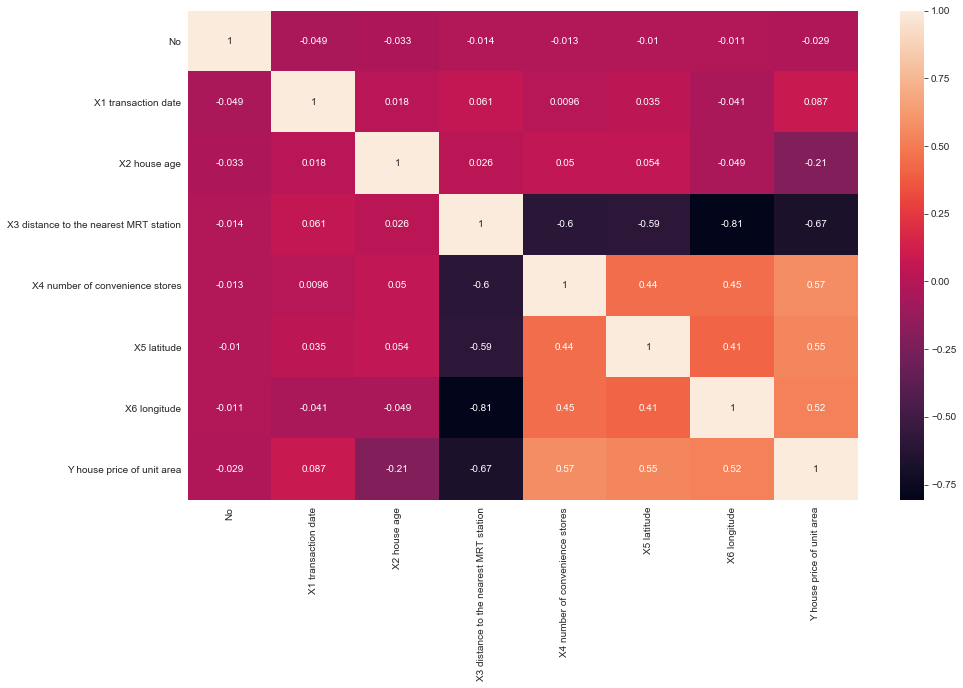

In [85]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

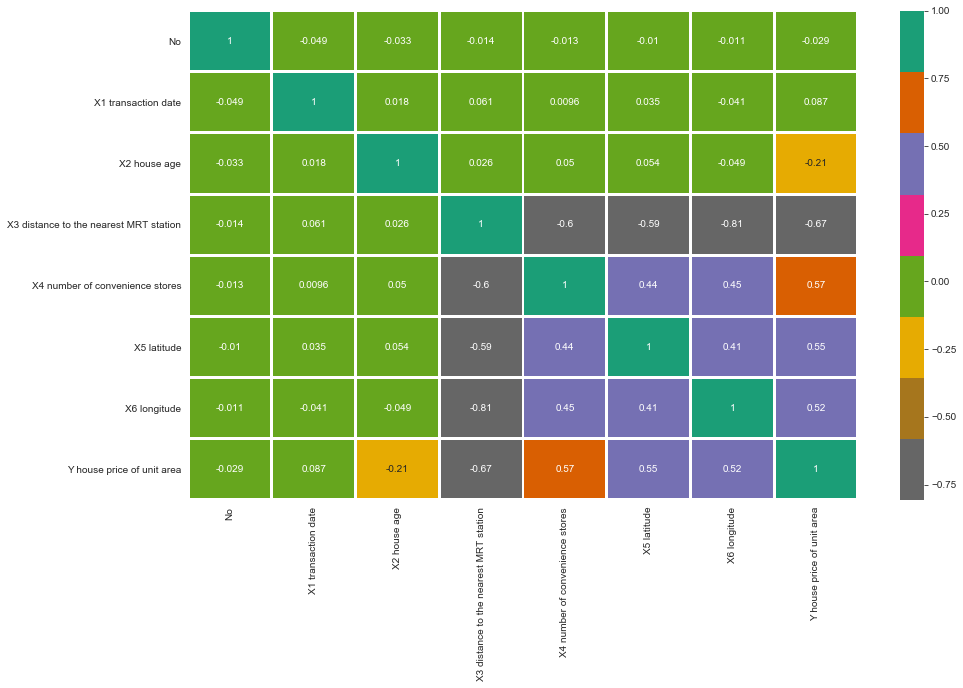

In [86]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

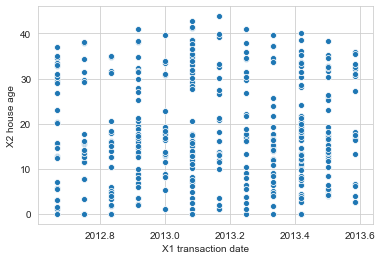

In [87]:
sns.scatterplot(x='X1 transaction date',y='X2 house age',data=df)

In [89]:
import sweetviz as sv

In [90]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [91]:
from IPython.display import IFrame

In [92]:
IFrame(src='Analyze.html',width=1000,height=600)

In [93]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


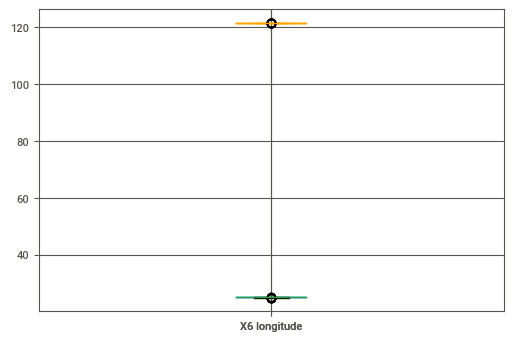

In [94]:
df.boxplot(column="X5 latitude")
df.boxplot(column="X6 longitude",color='orange')

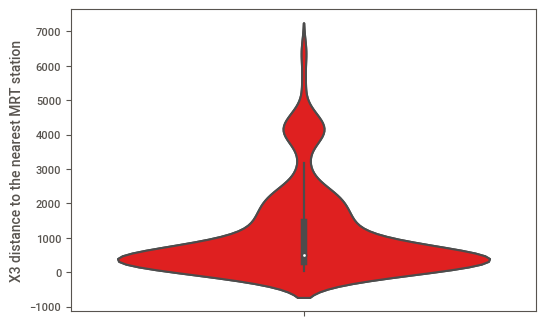

In [95]:
sns.violinplot(y="X3 distance to the nearest MRT station",data=df,color='orange')
sns.violinplot(y="X3 distance to the nearest MRT station",data=df,color='red')

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [98]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [99]:
man=MinMaxScaler()
data=['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area']
df[data]=man.fit_transform(df[data])
df[data]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,0.275705
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,0.314832
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,0.361237
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,0.429481
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,0.323021
...,...,...,...,...,...,...,...
409,0.363537,0.312785,0.627820,0.0,0.114881,0.326504,0.070974
410,0.000000,0.127854,0.010375,0.9,0.512118,0.750162,0.385805
411,0.636463,0.429224,0.056861,0.7,0.571498,0.715225,0.300273
412,0.363537,0.184932,0.012596,0.5,0.420141,0.723959,0.408553


In [100]:
std=StandardScaler()
data=['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area']
df[data]=std.fit_transform(df[data])
df[data]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...,...
409,-0.528967,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,-1.711384,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,0.358734,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,-0.528967,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415
